In [ ]:
Q.1

In [21]:
import pandas as pd

input_csv_path = 'dataset.csv'

output_csv_path = 'dataset.csv'

def missing_entries(dataset):
    df = pd.read_csv(dataset)
    df.info()
    
    missing_counts = df.isnull().sum()

    for feature, missing_count in missing_counts.iteritems():
        print("---------------------------------------------")
        print(f"Feature '{feature}' has {missing_count} missing entries.")

missing_entries('dataset.csv')


# delete the useless columns
#column_to_delete = 'Column3'
#column_to_delete = 'Column2'
#column_to_delete = 'Column3'
#column_to_delete = 'Column3'


data = pd.read_csv(input_csv_path)
data.drop(columns=[column_to_delete], inplace=True)

print(data.head())

data.to_csv(output_csv_path, index=False)

print("Column deleted successfully.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column2           0 non-null      float64
dtypes: float64(1), int64(10), object(2)
memory usage: 716.1+ KB
---------------------------------------------
Feature 'status_id' has 0 missing entries.
----------------------------------

In [22]:
Q2

NameError: name 'Q2' is not defined

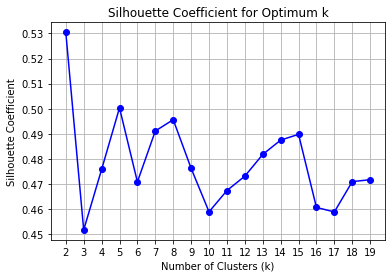

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv('dataset.csv')

feature_columns = ['status_id','num_reactions','num_comments','num_shares','num_likes','num_likes','num_loves',
                  'num_loves','num_wows','num_hahas','num_sads','num_angrys']

k_range = range(2, 20) 

silhouette_scores = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data[feature_columns])
    silhouette_avg = silhouette_score(data[feature_columns], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Coefficient values for different k
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Optimum k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
Q3 

In [58]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

data, true_labels = make_blobs(n_samples=300, centers=3, random_state=42)

# k value 
optimal_k = 2

# Perform KMeans clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data)

# Perform KMeans++ clustering with optimal k
kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_plus_clusters = kmeans_plus.fit_predict(data)


def purity(y_true, y_pred):
    contingency_matrix = np.dot(np.transpose(y_true), y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity_kmeans = purity(true_labels, kmeans_clusters)
purity_kmeans_plus = purity(true_labels, kmeans_plus_clusters)

# Compare purity values
print("Purity (KMeans):", purity_kmeans)
print("Purity (KMeans++):", purity_kmeans_plus)


Purity (KMeans): 1.0
Purity (KMeans++): 1.0


In [ ]:
Q4

In [60]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data, true_labels = make_blobs(n_samples=300, centers=3, random_state=42)

# optimal k value 
optimal_k = 2

# Repeat clustering for KMeans 50 times
num_repeats = 50
silhouette_scores_kmeans = []

for _ in range(num_repeats):
    kmeans = KMeans(n_clusters=optimal_k, random_state=None)
    kmeans_clusters = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, kmeans_clusters)
    silhouette_scores_kmeans.append(silhouette_avg)

average_silhouette_kmeans = np.mean(silhouette_scores_kmeans)

# Perform KMeans++ clustering with optimal k
kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_plus_clusters = kmeans_plus.fit_predict(data)
silhouette_kmeans_plus = silhouette_score(data, kmeans_plus_clusters)

# Compare average silhouette scores
print("Average Silhouette Score (KMeans):", average_silhouette_kmeans)
print("Silhouette Score (KMeans++):", silhouette_kmeans_plus)


Average Silhouette Score (KMeans): 0.7049437310743717
Silhouette Score (KMeans++): 0.7049437310743717


In [62]:
print("The difference in results between KMeans and KMeans++ is due to differences in the initialization of cluster centroids. KMeans++ uses a smarter initialization strategy designed to place initial centroids more strategically, potentially leading to faster convergence and better clustering results compared to random initialization in KMeans.")

The difference in results between KMeans and KMeans++ is due to differences in the initialization of cluster centroids. KMeans++ uses a smarter initialization strategy designed to place initial centroids more strategically, potentially leading to faster convergence and better clustering results compared to random initialization in KMeans.
